In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score,classification_report
import statsmodels.api as sm


In [3]:
before_df = pd.read_csv('before.csv')
after_df = pd.read_csv('after.csv')

print("before.csv:")
print(before_df.head())
print("\nafter.csv:")
print(after_df.head())

before.csv:
  Day+D6A1:D102  Time Spent Check-In Time Check-Out Time
0    2023-07-01          63         11:36          12:39
1    2023-07-02          91         11:06          12:37
2    2023-07-03           0         00:00          00:00
3    2023-07-04          86         11:28          12:54
4    2023-07-05          33         17:31          18:04

after.csv:
  Day+D6A1:D102  Time Spent Check-In Time Check-Out Time  \
0    2023-10-02           0         00:00          00:00   
1    2023-10-03          70         11:32          12:42   
2    2023-10-04          85         12:34          13:59   
3    2023-10-05           0         00:00          00:00   
4    2023-10-06          75         12:03          13:18   

   Number of Project Deadline  Number of Homework Deadline  Number of Exam  
0                         NaN                          NaN             NaN  
1                         NaN                          NaN             NaN  
2                         NaN             

In [4]:
before_info = before_df.info()
before_head = before_df.head()

after_info = after_df.info()
after_head = after_df.head()

before_info, before_head, after_info, after_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Day+D6A1:D102   93 non-null     object
 1   Time Spent      93 non-null     int64 
 2   Check-In Time   93 non-null     object
 3   Check-Out Time  93 non-null     object
dtypes: int64(1), object(3)
memory usage: 3.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Day+D6A1:D102                91 non-null     object 
 1   Time Spent                   91 non-null     int64  
 2   Check-In Time                91 non-null     object 
 3   Check-Out Time               91 non-null     object 
 4   Number of Project Deadline   17 non-null     float64
 5   Number of Homework Deadline  10 non-null     float64
 6   Number of Exa

(None,
   Day+D6A1:D102  Time Spent Check-In Time Check-Out Time
 0    2023-07-01          63         11:36          12:39
 1    2023-07-02          91         11:06          12:37
 2    2023-07-03           0         00:00          00:00
 3    2023-07-04          86         11:28          12:54
 4    2023-07-05          33         17:31          18:04,
 None,
   Day+D6A1:D102  Time Spent Check-In Time Check-Out Time  \
 0    2023-10-02           0         00:00          00:00   
 1    2023-10-03          70         11:32          12:42   
 2    2023-10-04          85         12:34          13:59   
 3    2023-10-05           0         00:00          00:00   
 4    2023-10-06          75         12:03          13:18   
 
    Number of Project Deadline  Number of Homework Deadline  Number of Exam  
 0                         NaN                          NaN             NaN  
 1                         NaN                          NaN             NaN  
 2                         NaN     

In [5]:
missing_values_before = before_df.isnull().sum()
missing_values_after = after_df.isnull().sum()

missing_values_before, missing_values_after

(Day+D6A1:D102     0
 Time Spent        0
 Check-In Time     0
 Check-Out Time    0
 dtype: int64,
 Day+D6A1:D102                   0
 Time Spent                      0
 Check-In Time                   0
 Check-Out Time                  0
 Number of Project Deadline     74
 Number of Homework Deadline    81
 Number of Exam                 87
 dtype: int64)

In [6]:
after_df_filled = after_df.fillna(0)

after_df_filled.isnull().sum()

Day+D6A1:D102                  0
Time Spent                     0
Check-In Time                  0
Check-Out Time                 0
Number of Project Deadline     0
Number of Homework Deadline    0
Number of Exam                 0
dtype: int64

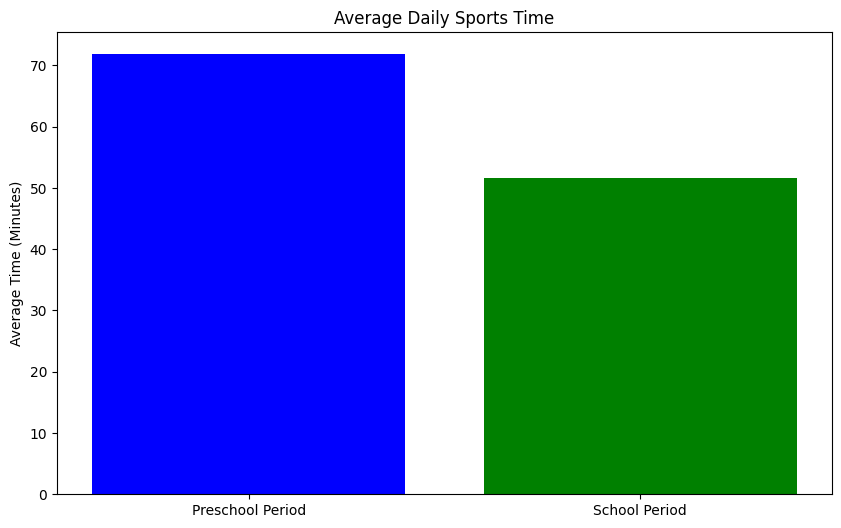

In [7]:
avg_time_spent_before = before_df['Time Spent'].mean()
avg_time_spent_after = after_df['Time Spent'].mean()

plt.figure(figsize=(10, 6))
plt.bar(["Preschool Period", "School Period"], [avg_time_spent_before, avg_time_spent_after], color=['blue', 'green'])
plt.title("Average Daily Sports Time")
plt.ylabel("Average Time (Minutes)")
plt.show()

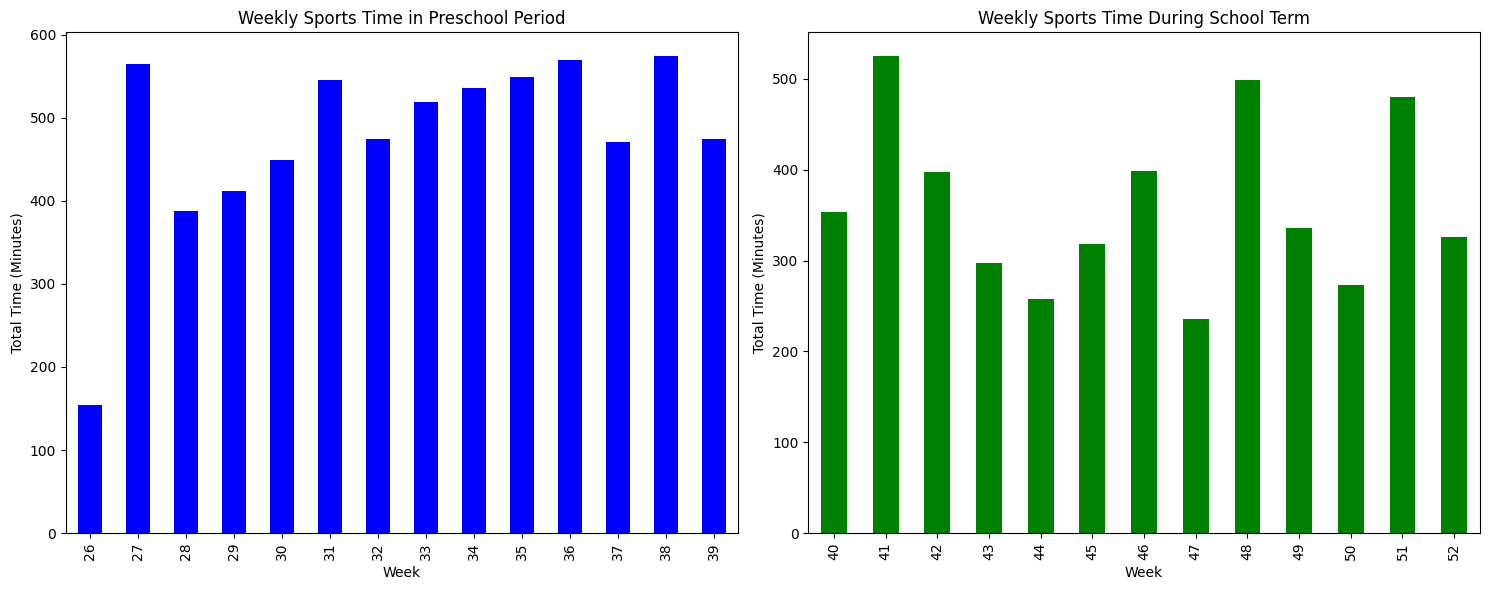

In [8]:
before_df['Day+D6A1:D102'] = pd.to_datetime(before_df['Day+D6A1:D102'])
after_df_filled['Day+D6A1:D102'] = pd.to_datetime(after_df_filled['Day+D6A1:D102'])

weekly_sum_before = before_df.groupby(before_df['Day+D6A1:D102'].dt.isocalendar().week)['Time Spent'].sum()
weekly_sum_after = after_df_filled.groupby(after_df_filled['Day+D6A1:D102'].dt.isocalendar().week)['Time Spent'].sum()

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
weekly_sum_before.plot(kind='bar', color='blue')
plt.title('Weekly Sports Time in Preschool Period')
plt.xlabel('Week')
plt.ylabel('Total Time (Minutes)')

plt.subplot(1, 2, 2)
weekly_sum_after.plot(kind='bar', color='green')
plt.title('Weekly Sports Time During School Term')
plt.xlabel('Week')
plt.ylabel('Total Time (Minutes)')

plt.tight_layout()
plt.show()

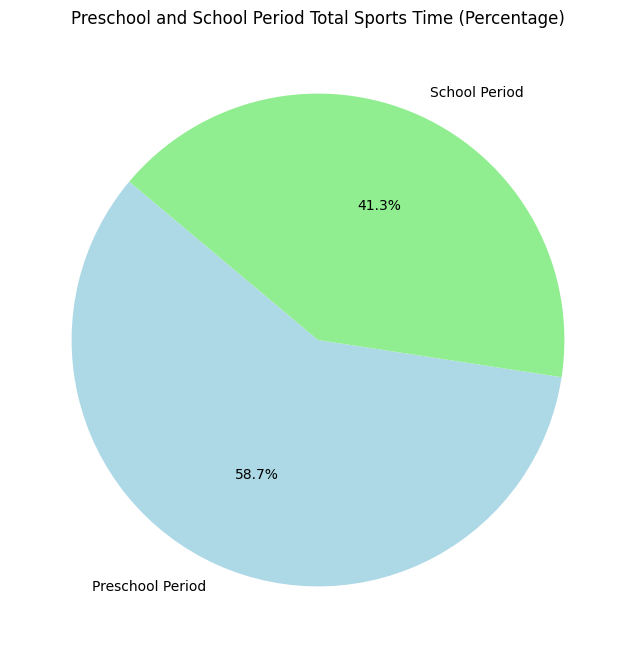

In [9]:
total_time_spent_before = before_df['Time Spent'].sum()
total_time_spent_after = after_df_filled['Time Spent'].sum()

labels = ['Preschool Period', 'School Period']
sizes = [total_time_spent_before, total_time_spent_after]
colors = ['lightblue', 'lightgreen']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Preschool and School Period Total Sports Time (Percentage)')
plt.show()

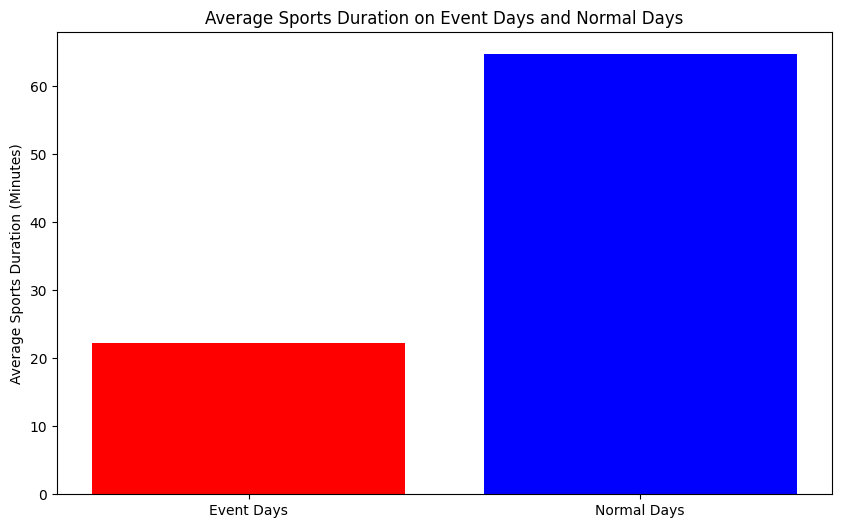

In [10]:
after_df['Activity'] = 0  

after_df.loc[(after_df['Number of Project Deadline'] > 0) | (after_df['Number of Homework Deadline'] > 0) | (after_df['Number of Exam'] > 0), 'Activity'] = 1

event_days = after_df[after_df['Activity'] > 0]
non_event_days = after_df[after_df['Activity'] == 0]

avg_time_event_days = event_days['Time Spent'].mean()
avg_time_non_event_days = non_event_days['Time Spent'].mean()

data_to_plot = [event_days['Time Spent'], non_event_days['Time Spent']]
labels = ['Event Days', 'Normal Days']
average_times = [avg_time_event_days, avg_time_non_event_days]

plt.figure(figsize=(10, 6))
plt.bar(labels, average_times, color=['red', 'blue'])
plt.title('Average Sports Duration on Event Days and Normal Days')
plt.ylabel('Average Sports Duration (Minutes)')
plt.show()

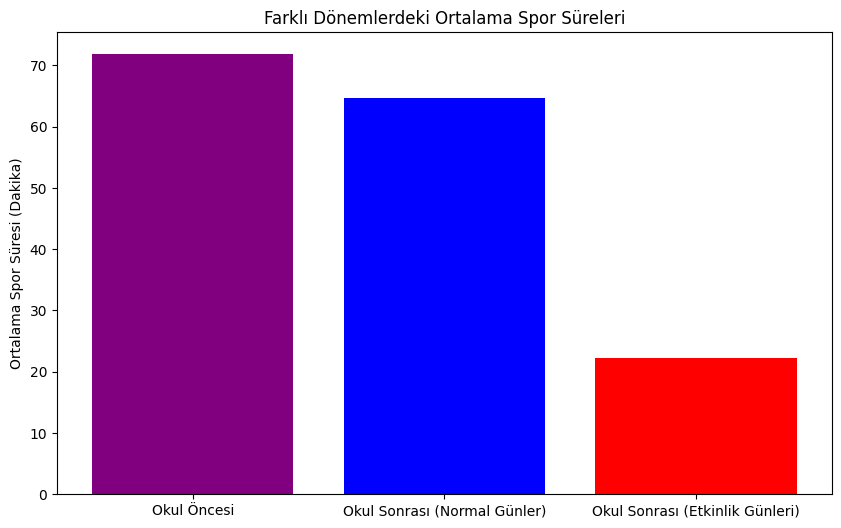

In [11]:
avg_time_before = before_df['Time Spent'].mean()

labels = ['Okul Öncesi', 'Okul Sonrası (Normal Günler)', 'Okul Sonrası (Etkinlik Günleri)']
average_times = [avg_time_before, avg_time_non_event_days, avg_time_event_days]

plt.figure(figsize=(10, 6))
plt.bar(labels, average_times, color=['purple', 'blue', 'red'])
plt.title('Farklı Dönemlerdeki Ortalama Spor Süreleri')
plt.ylabel('Ortalama Spor Süresi (Dakika)')
plt.show()

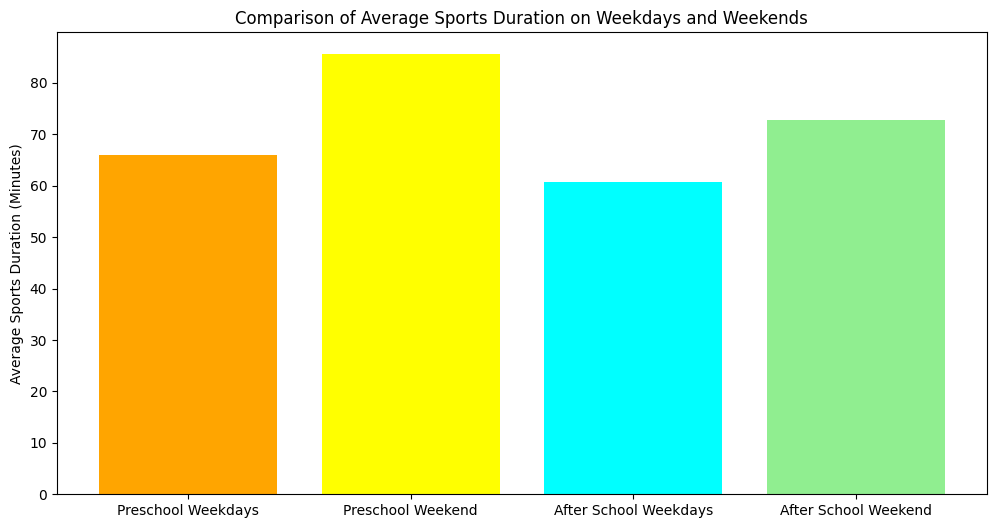

(65.9076923076923, 85.53571428571429, 60.61904761904762, 72.80952380952381)

In [12]:
after_df['Event'] = (after_df[['Number of Project Deadline', 'Number of Homework Deadline', 'Number of Exam']].notnull().any(axis=1)).astype(int)

before_df['Day+D6A1:D102'] = pd.to_datetime(before_df['Day+D6A1:D102'])
after_df['Day+D6A1:D102'] = pd.to_datetime(after_df['Day+D6A1:D102'])

non_event_days_only = after_df[after_df['Event'] == 0]

before_weekdays = before_df[before_df['Day+D6A1:D102'].dt.weekday < 5]['Time Spent']
before_weekends = before_df[before_df['Day+D6A1:D102'].dt.weekday >= 5]['Time Spent']
after_weekdays = non_event_days_only[non_event_days_only['Day+D6A1:D102'].dt.weekday < 5]['Time Spent']
after_weekends = non_event_days_only[non_event_days_only['Day+D6A1:D102'].dt.weekday >= 5]['Time Spent']

avg_before_weekdays = before_weekdays.mean()
avg_before_weekends = before_weekends.mean()
avg_after_weekdays = after_weekdays.mean()
avg_after_weekends = after_weekends.mean()

labels = ['Preschool Weekdays', 'Preschool Weekend', 'After School Weekdays', 'After School Weekend']
average_times = [avg_before_weekdays, avg_before_weekends, avg_after_weekdays, avg_after_weekends]

plt.figure(figsize=(12, 6))
plt.bar(labels, average_times, color=['orange', 'yellow', 'cyan', 'lightgreen'])
plt.title('Comparison of Average Sports Duration on Weekdays and Weekends')
plt.ylabel('Average Sports Duration (Minutes)')
plt.show()

(avg_before_weekdays, avg_before_weekends, avg_after_weekdays, avg_after_weekends)

In [17]:
before_data_path = 'before.csv'
after_data_path = 'after.csv'

before_df = pd.read_csv(before_data_path)
after_df = pd.read_csv(after_data_path)

before_df['events'] = 0

after_df['events'] = (after_df[['Number of Project Deadline', 'Number of Homework Deadline', 'Number of Exam']].notnull().any(axis=1)).astype(int)

combined_time_spent = pd.concat([before_df[['Time Spent', 'events']], after_df[['Time Spent', 'events']]], ignore_index=True)
combined_time_spent['period'] = 0
combined_time_spent.loc[:92, 'period'] = 1
combined_time_spent.head(95)  


,Time Spent,events,period
0,63,0,1
1,91,0,1
2,0,0,1
3,86,0,1
4,33,0,1
...,...,...,...
90,66,0,1
91,117,0,1
92,102,0,1
93,0,0,0


In [25]:
X = combined_time_spent[['events', 'period']]
Y = combined_time_spent['Time Spent']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Time Spent   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     18.55
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           4.71e-08
Time:                        21:15:17   Log-Likelihood:                -928.91
No. Observations:                 184   AIC:                             1864.
Df Residuals:                     181   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6825      4.788     13.509      0.0

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(Y_test, Y_pred)
print("R-squared (R²) Score:", r2)

Mean Squared Error (MSE): 1383.0711544743845
R-squared (R²) Score: 0.004545358227913687


In [29]:
threshold = 0.5
combined_time_spent['Time Spent Class'] = combined_time_spent['Time Spent'].apply(lambda x: 1 if x >= threshold else 0)

X = combined_time_spent[['events', 'period']]
Y = combined_time_spent['Time Spent Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(Y_test, Y_pred, average='weighted')

print("F1 Score:", f1)

Accuracy: 0.8108108108108109
F1 Score: 0.8321048321048321
